# 이미지가 픽셀 그리드다

In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

Image shape: (565, 1001, 3)


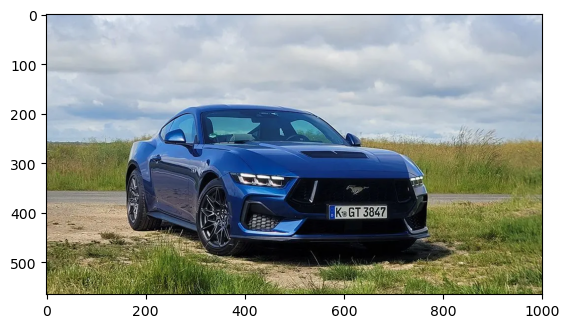

In [5]:
# 이미지 표시
image = mpimg.imread('2025-Ford-Mustand-GT-1001x565.jpg')

# 이미지 크기
print('Image shape:', image.shape)
plt.imshow(image)
plt.show()

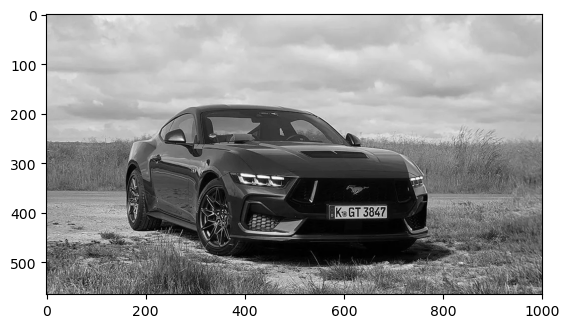

In [7]:
# grayscale 변환
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [8]:
# 아무 픽셀 값을 출력합니다
x, y = 100, 100
print('Pixel value at (100, 100):', gray[x,y])

# 픽셀 값의 범위
print('Pixel value range:', gray.min(), 'to', gray.max())

# 픽셀 값의 평균과 표준편차
print('Pixel value mean:', gray.mean())
print('Pixel value std:', gray.std())

Pixel value at (100, 100): 189
Pixel value range: 0 to 255
Pixel value mean: 135.16736184169812
Pixel value std: 67.70907534317755


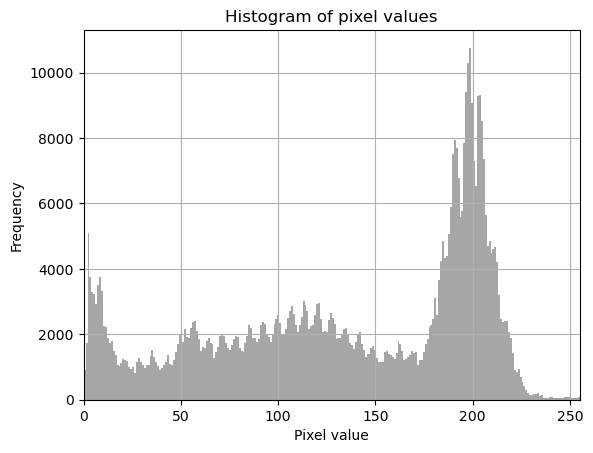

In [9]:
# 픽셀 값의 히스토그램을 그립니다
plt.hist(gray.ravel(), bins=256, range=(gray.min(), gray.max()),
         color='gray', alpha=0.7)
plt.title('Histogram of pixel values')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.xlim(gray.min(), gray.max())
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

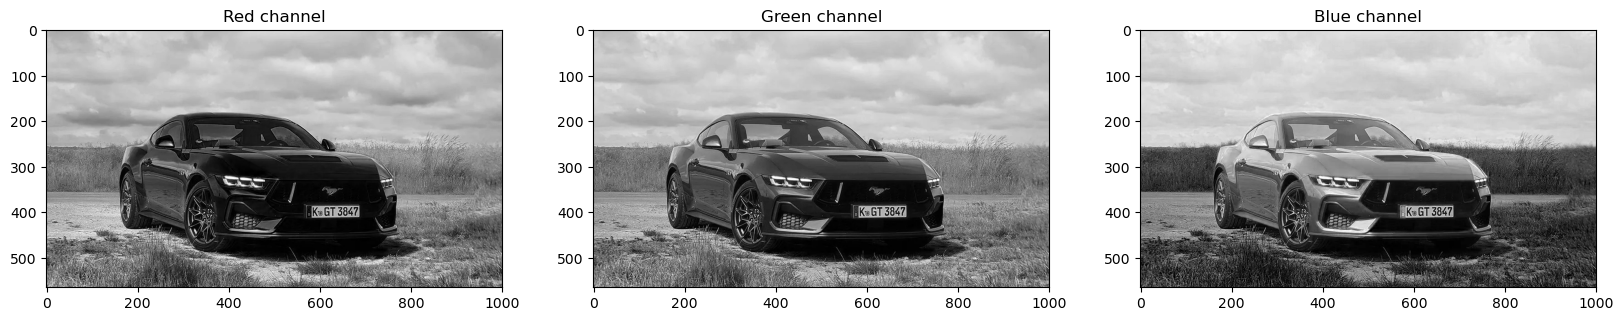

In [14]:
# RGB 채널을 분리합니다
# r, g, b = cv2.split(image)
r = image[:, :, 0]
g = image[:, :, 1]
b = image[:, :, 2]

# 각 채널의 시각을 그립니다
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(r, cmap='gray')
ax1.set_title('Red channel')

ax2.imshow(g, cmap='gray')
ax2.set_title('Green channel')

ax3.imshow(b, cmap='gray')
ax3.set_title('Blue channel')

plt.show()


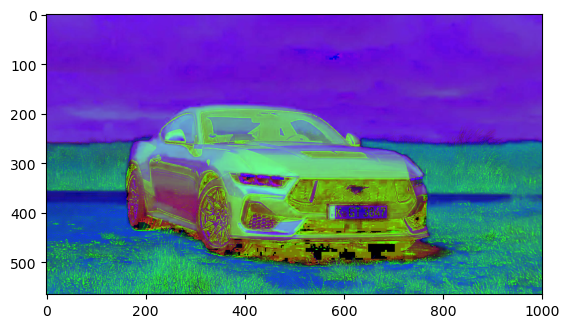

In [16]:
# HSV 색상 공간으로 변환합니다
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show()

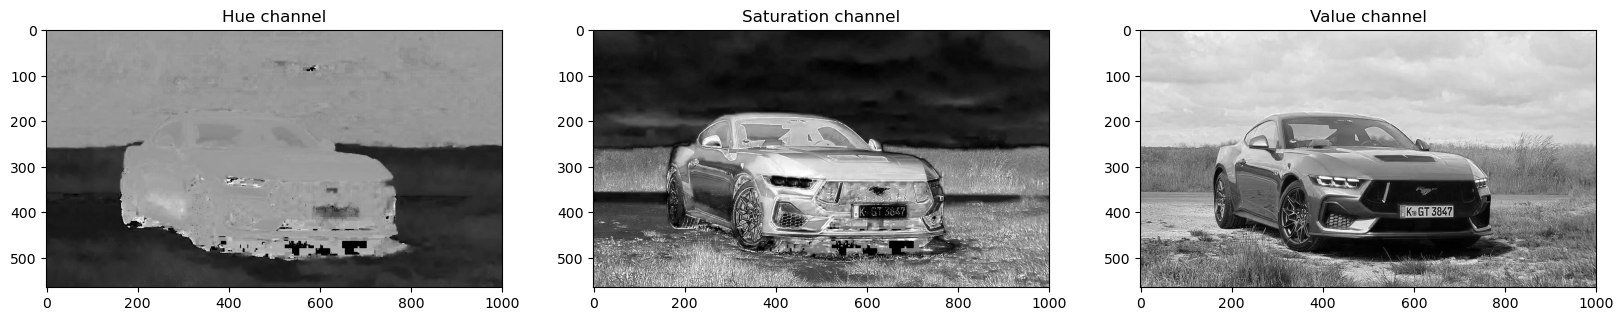

In [18]:
# HSV 채널을 분리합니다
# h, s, v = cv2.split(hsv)
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]

# 각 채널의 시각을 그립니다
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(h, cmap='gray')
ax1.set_title('Hue channel')

ax2.imshow(s, cmap='gray')
ax2.set_title('Saturation channel')

ax3.imshow(v, cmap='gray')
ax3.set_title('Value channel')

plt.show()

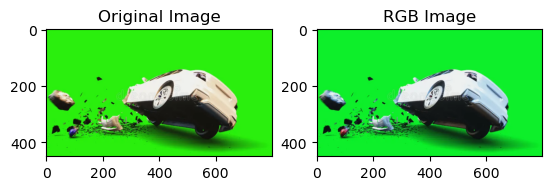

In [19]:
# Green Screen
green_screen = cv2.imread('accident.jpg')
green_screen_rgb = cv2.cvtColor(green_screen, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(green_screen)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(green_screen_rgb)
plt.title('RGB Image')

plt.show()

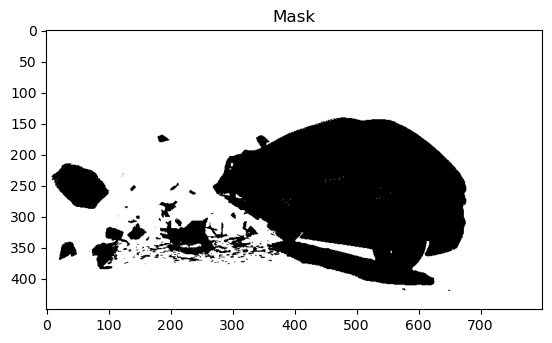

In [21]:
# 임계값 설정
lower_green = np.array([0, 100, 0])
upper_green = np.array([100, 255, 100])

mask = cv2.inRange(green_screen_rgb, lower_green, upper_green)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.show()

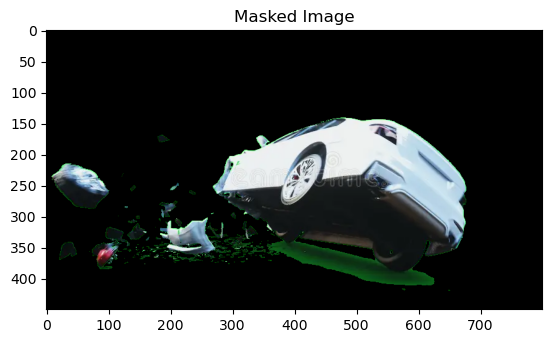

In [25]:
# 마스크 사용하고 배경을 제거합니다
masked_image = np.copy(green_screen_rgb)
masked_image[mask !=0] = [0, 0, 0]
plt.imshow(masked_image)
plt.title('Masked Image')
plt.show()